In [ ]:
# first exercies begins here

In [1]:
import numpy as np

# analytical version of linear regression
def alr(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# numerical version of linear regression
def nlr(thetha, X, y):
    a = y - np.dot(X, thetha)
    b = y - np.dot(X, thetha)
    return (1/len(X)) * np.dot(a, b)


In [3]:
# prepare dataset
from sklearn.datasets import make_regression
from scipy.optimize import minimize

input_samples, output_values = make_regression(n_samples=1023, n_features=1, noise=42)

print(output_values.shape)

X = np.ones((len(input_samples), 2))
X[:, 1] = input_samples.T

(1023,)


In [247]:
# find thetha vector using both version of linear regression
analytical_result = alr(X, output_values)
numerical_result = minimize(nlr, [1, 1], args=(X, output_values), method='Powell').x

print(analytical_result)
print(numerical_result)

[-1.03739442 94.7478778 ]
[-1.03739413 94.74787751]


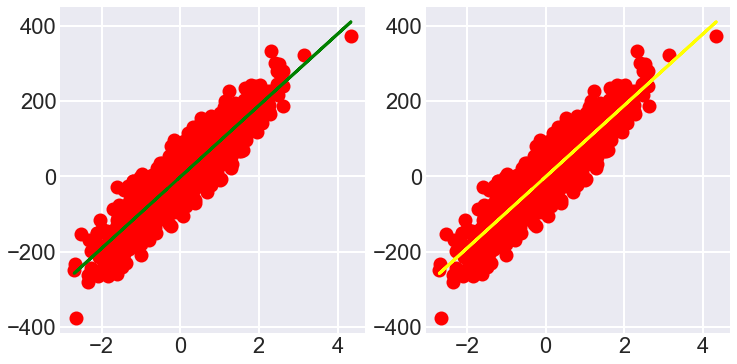

In [248]:
# construct plot for both results, which are pretty identical
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme(context='poster', style='whitegrid')
plt.style.use('seaborn-darkgrid')

fig, axs = plt.subplots(1, 2 ,figsize=(12, 6))
axs[0].plot(input_samples, input_samples * analytical_result[1] + analytical_result[0], color='green')
axs[1].plot(input_samples, input_samples * numerical_result[1] + numerical_result[0], color='yellow')
axs[0].scatter(input_samples, output_values, color='red')
axs[1].scatter(input_samples, output_values, color='red')

plt.show()

In [249]:
import time
import tracemalloc
# measure time and memory
times = []
memories = []

tracemalloc.start()

before = time.time()
tracemalloc.clear_traces()
membefore = tracemalloc.take_snapshot()
for i in range(0, 100):
    alr(X, output_values)
after = time.time()
memafter = tracemalloc.take_snapshot()
times.append(after - before)
top_stats = memafter.compare_to(membefore, 'lineno')
for stat in top_stats[:1]:
    memories.append(stat.size_diff)

before = time.time()
tracemalloc.clear_traces()
membefore = tracemalloc.take_snapshot()
for i in range(0, 100):
    minimize(nlr, [1, 1], args=(X, output_values), method='Powell')
after = time.time()
memafter = tracemalloc.take_snapshot()
times.append(after - before)
for stat in top_stats[:1]:
    memories.append(stat.size_diff)

[0.17705297470092773, 0.7369410991668701]


Text(0.5, 0, 'memory')

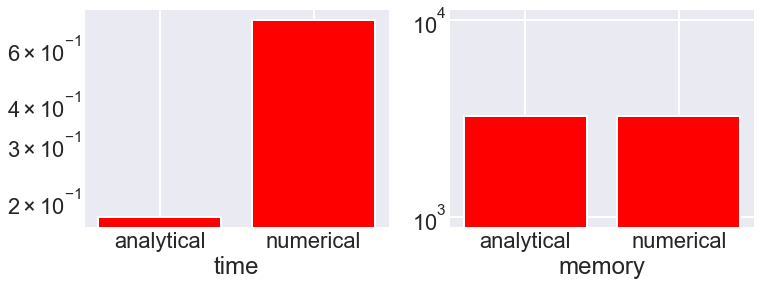

In [250]:
# plot results (i'm not sure how does the emmory module work, cause obv here it doesn't seem to be working)
fig, axs = plt.subplots(1, 2 ,figsize=(12, 4))

print(times)

axs[0].bar(['analytical', 'numerical'], times, color='red', log=True)
axs[0].set_xlabel('time')
axs[1].bar(['analytical', 'numerical'], memories, color='red', log=True)
axs[1].set_xlabel('memory')

In [251]:
# Jak pokazuje wykres, numeryczna regresja liniowa jest nieporównywalnie wolniejsza, przy niewiele różniących się od wersji analitycznej wynikach

In [252]:
# second exercies begins here

In [253]:
# load data
import pandas as pd

df1=pd.read_csv('./first_task.csv', sep=',',header=None)
first_x = df1[0].values
first_y = df1[1].values

df2=pd.read_csv('./second_task.csv', sep=',',header=None)
second_x = df2[0].values
second_y = df2[1].values

df3=pd.read_csv('./third_task.csv', sep=',',header=None)
third_x = df3[0].values
third_y = df3[1].values


In [254]:
# predict (i would refractor this, but i hae no time, so i do reapeat code :X)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

XDF1 = pd.DataFrame(first_x)
YDF1 = pd.DataFrame(first_y)

polyreg19=make_pipeline(PolynomialFeatures(9),LinearRegression())
polyreg19.fit(XDF1, YDF1)

XDF2 = pd.DataFrame(second_x)
YDF2 = pd.DataFrame(second_y)

polyreg29=make_pipeline(PolynomialFeatures(9),LinearRegression())
polyreg29.fit(XDF2, YDF2)

XDF3 = pd.DataFrame(third_x)
YDF3 = pd.DataFrame(third_y)

polyreg39=make_pipeline(PolynomialFeatures(9),LinearRegression())
polyreg39.fit(XDF2, YDF2)

XDF4 = pd.DataFrame(first_x)
YDF1 = pd.DataFrame(first_y)

polyreg121=make_pipeline(PolynomialFeatures(21),LinearRegression())
polyreg121.fit(XDF1, YDF1)

XDF2 = pd.DataFrame(second_x)
YDF2 = pd.DataFrame(second_y)

polyreg221=make_pipeline(PolynomialFeatures(21),LinearRegression())
polyreg221.fit(XDF2, YDF2)

XDF3 = pd.DataFrame(third_x)
YDF3 = pd.DataFrame(third_y)

polyreg321=make_pipeline(PolynomialFeatures(21),LinearRegression())
polyreg321.fit(XDF2, YDF2)

X1 = np.ones((len(first_x), 2))
X1[:, 1] = first_x.T
analytical_result1 = alr(X1, first_y)

X2 = np.ones((len(second_x), 2))
X2[:, 1] = second_x.T
analytical_result2 = alr(X2, second_y)

X3 = np.ones((len(third_x), 2))
X3[:, 1] = third_x.T
analytical_result3 = alr(X3, third_y)


Text(0.5, 1.0, 'third set - degree 21')

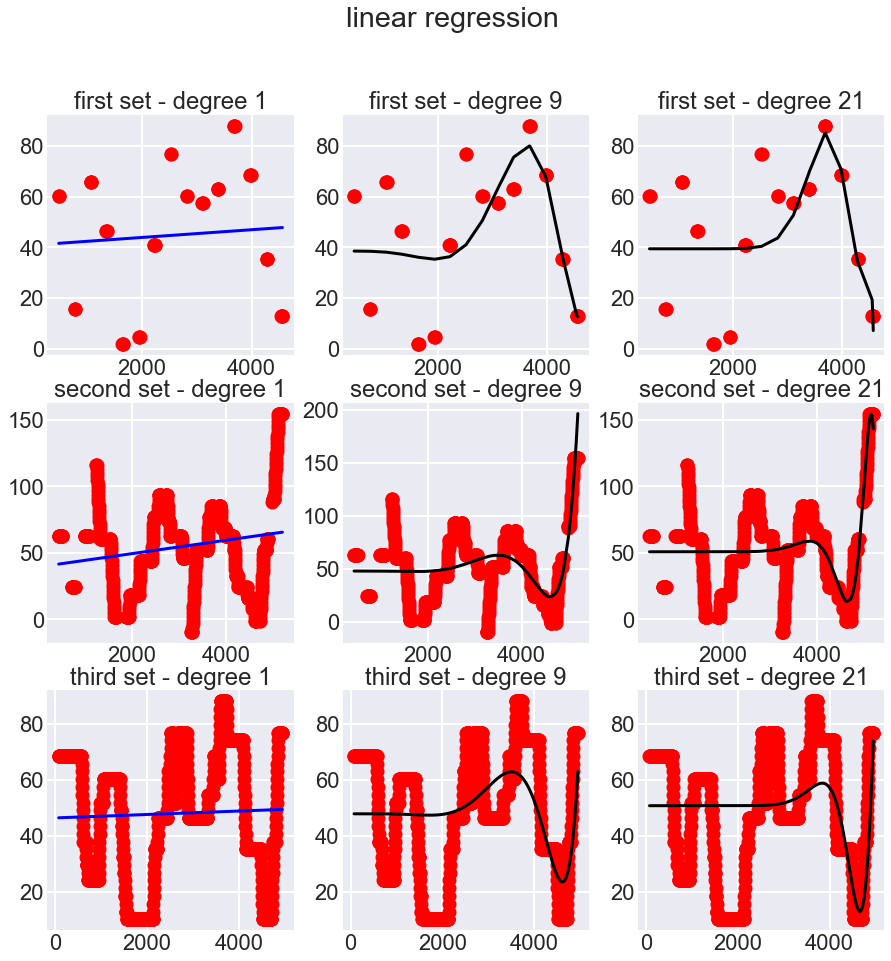

<Figure size 432x288 with 0 Axes>

In [255]:
# plot results 
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15, 15))

plt.figure()
fig.suptitle('linear regression')

ax1.plot(first_x, first_x * analytical_result1[1] + analytical_result1[0], color='blue')
ax1.scatter(first_x, first_y, color='red')
ax1.set_title("first set - degree 1")

ax4.plot(second_x, second_x * analytical_result2[1] + analytical_result2[0], color='blue')
ax4.scatter(second_x, second_y, color='red')
ax4.set_title("second set - degree 1")

ax7.plot(third_x, third_x * analytical_result3[1] + analytical_result3[0], color='blue')
ax7.scatter(third_x, third_y, color='red')
ax7.set_title("third set - degree 1")

ax2.plot(first_x.reshape(-1, 1), polyreg19.predict(first_x.reshape(-1, 1)), color="black")
ax2.scatter(first_x, first_y, color='red')
ax2.set_title("first set - degree 9")

ax5.plot(second_x.reshape(-1, 1), polyreg29.predict(second_x.reshape(-1, 1)), color="black")
ax5.scatter(second_x, second_y, color='red')
ax5.set_title("second set - degree 9")

ax8.plot(third_x.reshape(-1, 1), polyreg39.predict(third_x.reshape(-1, 1)), color="black")
ax8.scatter(third_x, third_y, color='red')
ax8.set_title("third set - degree 9")

ax3.plot(first_x.reshape(-1, 1), polyreg121.predict(first_x.reshape(-1, 1)), color="black")
ax3.scatter(first_x, first_y, color='red')
ax3.set_title("first set - degree 21")

ax6.plot(second_x.reshape(-1, 1), polyreg221.predict(second_x.reshape(-1, 1)), color="black")
ax6.scatter(second_x, second_y, color='red')
ax6.set_title("second set - degree 21")

ax9.plot(third_x.reshape(-1, 1), polyreg321.predict(third_x.reshape(-1, 1)), color="black")
ax9.scatter(third_x, third_y, color='red')
ax9.set_title("third set - degree 21")

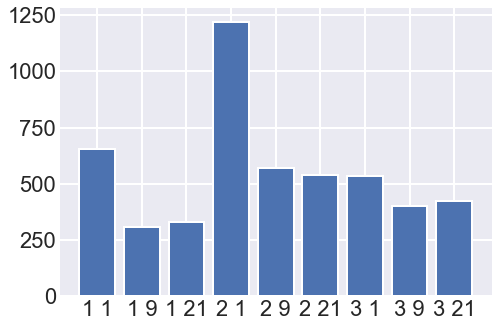

In [256]:
# count and plot mean squared errors for each result
def mean_squared_error(y1, y2):
    return ((y2 - y1) ** 2).mean(axis = 0)

mse11 = mean_squared_error(first_x * analytical_result1[1] + analytical_result1[0], first_y)
mse12 = mean_squared_error(polyreg19.predict(first_x.reshape(-1, 1)).T[0], first_y)
mse13 = mean_squared_error(polyreg121.predict(first_x.reshape(-1, 1)).T[0], first_y)
mse21 = mean_squared_error(second_x * analytical_result2[1] + analytical_result2[0], second_y)
mse22 = mean_squared_error(polyreg29.predict(second_x.reshape(-1, 1)).T[0], second_y)
mse23 = mean_squared_error(polyreg221.predict(second_x.reshape(-1, 1)).T[0], second_y)
mse31 = mean_squared_error(third_x * analytical_result3[1] + analytical_result3[0], third_y)
mse32 = mean_squared_error(polyreg39.predict(third_x.reshape(-1, 1)).T[0], third_y)
mse33 = mean_squared_error(polyreg321.predict(third_x.reshape(-1, 1)).T[0], third_y)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
regressions = ['1 1', '1 9', '1 21', '2 1', '2 9', '2 21', '3 1', '3 9', '3 21']
errors = [mse11, mse12, mse13, mse21, mse22, mse23, mse31, mse32, mse33]
ax.bar(regressions,errors)
plt.show()

In [257]:
# Po wynikach można sądzić, iż błędy są najmniejsze w wyniku pierwszego setu danych, jednak nie oznacza to wcale, że dopasowanie prostej jest najlepsze, wynika to prawdopodobnie z faktu, iż danych jest po prostu znacznie mniej, prosta najlepiej została dopasowana zatem w przypadku ostatniego setu danych, których było najwięcej z wykorzystaniem wielomianu 9 rzędu, tutaj danych jest najwięcej, jednak prosta może przypominać lot, a błą∂ średniokwadratowy faktycznie jest najmniejszy (z wyłączeniem tych z danych, których było mało)